<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/Parcial2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML - Aprendizaje No Supervisado**
Información sobre el dataset
Dataset:https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
Github: Dataset:

Estudiantes:
Pinto Mamani Paola Andrea Ing. de Sistemas

**Predicción de la Calidad en un Proceso Minero**

El objetivo principal es utilizar estos datos para predecir cuánta impureza hay en el concentrado de mineral. Como esta impureza se mide cada hora, si podemos predecir cuánta sílice (impureza) hay en el concentrado de mineral, podemos ayudar a los ingenieros, brindándoles información temprana para tomar medidas (¡empoderamiento!). Por lo tanto, podrán tomar acciones correctivas con anticipación (reducir las impurezas, si es el caso) y también ayudar al medio ambiente (reducir la cantidad de mineral que va a los relaves a medida que se reduce la sílice en el concentrado de mineral)

## LIMPIEZA DE DATASET

In [269]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [270]:
import pandas as pd

In [271]:
data = pd.read_csv("/content/gdrive/MyDrive/IA/DATASET/MiningProcess_Flotation_Plant_Database.csv", sep=",")
print(data)

                       date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0       2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1       2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2       2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3       2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4       2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   
...                     ...         ...           ...         ...        ...   
737448  2017-09-09 23:00:00       49,75          23,2     2710,94    441,052   
737449  2017-09-09 23:00:00       49,75          23,2     2692,01    473,436   
737450  2017-09-09 23:00:00       49,75          23,2      2692,2    500,488   
737451  2017-09-09 23:00:00       49,75          23,2     1164,12    491,548   
737452  2017-09-09 23:00:00       49,75          23,2     1164,12    468,019   

       Ore Pulp Flow Ore Pulp pH Ore Pu

Comprobamos si existen valores nulos

In [272]:
print(data.isnull().any())

date                            False
% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool


Comprobamos si existen valores no numéricos

In [273]:
# Verificar si hay valores no numéricos
non_numeric_columns = data.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Valores no numéricos en las columnas:
date                            True
% Iron Feed                     True
% Silica Feed                   True
Starch Flow                     True
Amina Flow                      True
Ore Pulp Flow                   True
Ore Pulp pH                     True
Ore Pulp Density                True
Flotation Column 01 Air Flow    True
Flotation Column 02 Air Flow    True
Flotation Column 03 Air Flow    True
Flotation Column 04 Air Flow    True
Flotation Column 05 Air Flow    True
Flotation Column 06 Air Flow    True
Flotation Column 07 Air Flow    True
Flotation Column 01 Level       True
Flotation Column 02 Level       True
Flotation Column 03 Level       True
Flotation Column 04 Level       True
Flotation Column 05 Level       True
Flotation Column 06 Level       True
Flotation Column 07 Level       True
% Iron Concentrate              True
% Silica Concentrate            True
dtype: bool


In [274]:
##data = data.applymap(pd.to_numeric, errors='ignore')

In [275]:
data['date'] = pd.to_datetime(data['date']).astype('int64')

In [276]:
#analizamos los valores contenidos dentro del mes
data['date'].unique()

array([1489107600000000000, 1489111200000000000, 1489114800000000000, ...,
       1504990800000000000, 1504994400000000000, 1504998000000000000])

In [277]:
# Reemplazar la coma con un punto y convertir a float
# Asegúrate de que la columna '% Iron Feed' sea de tipo string antes de usar .str
data['% Iron Feed'] = data['% Iron Feed'].astype(str).str.replace(',', '.').astype(float)

In [278]:
data['Starch Flow'] = data['Starch Flow'].astype(str).str.replace(',', '.').astype(float)
data['Amina Flow'] = data['Amina Flow'].astype(str).str.replace(',', '.').astype(float)
data['% Silica Feed'] = data['% Silica Feed'].astype(str).str.replace(',', '.').astype(float)
data['Ore Pulp Flow'] = data['Ore Pulp Flow'].astype(str).str.replace(',', '.').astype(float)
data['Ore Pulp pH'] = data['Ore Pulp pH'].astype(str).str.replace(',', '.').astype(float)
data['Ore Pulp Density'] = data['Ore Pulp Density'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 01 Air Flow'] = data['Flotation Column 01 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 02 Air Flow'] = data['Flotation Column 02 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 03 Air Flow'] = data['Flotation Column 03 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 04 Air Flow'] = data['Flotation Column 04 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 05 Air Flow'] = data['Flotation Column 05 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 06 Air Flow'] = data['Flotation Column 06 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 07 Air Flow'] = data['Flotation Column 07 Air Flow'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 01 Level'] = data['Flotation Column 01 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 02 Level'] = data['Flotation Column 02 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 03 Level'] = data['Flotation Column 03 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 04 Level'] = data['Flotation Column 04 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 05 Level'] = data['Flotation Column 05 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 06 Level'] = data['Flotation Column 06 Level'].astype(str).str.replace(',', '.').astype(float)
data['Flotation Column 07 Level'] = data['Flotation Column 07 Level'].astype(str).str.replace(',', '.').astype(float)



In [279]:
data['% Iron Concentrate'] = data['% Iron Concentrate'].astype(str).str.replace(',', '.').astype(float)
data['% Silica Concentrate'] = data['% Silica Concentrate'].astype(str).str.replace(',', '.').astype(float)

In [280]:
#analizamos los valores contenidos dentro del mes
data['Amina Flow'].unique()

array([557.434, 563.965, 568.054, ..., 452.492, 466.423, 473.436])

In [281]:
# Verificar si hay valores no numéricos
non_numeric_columns = data.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any()
print("Valores no numéricos en las columnas:")
print(non_numeric_columns)

Valores no numéricos en las columnas:
date                            False
% Iron Feed                     False
% Silica Feed                   False
Starch Flow                     False
Amina Flow                      False
Ore Pulp Flow                   False
Ore Pulp pH                     False
Ore Pulp Density                False
Flotation Column 01 Air Flow    False
Flotation Column 02 Air Flow    False
Flotation Column 03 Air Flow    False
Flotation Column 04 Air Flow    False
Flotation Column 05 Air Flow    False
Flotation Column 06 Air Flow    False
Flotation Column 07 Air Flow    False
Flotation Column 01 Level       False
Flotation Column 02 Level       False
Flotation Column 03 Level       False
Flotation Column 04 Level       False
Flotation Column 05 Level       False
Flotation Column 06 Level       False
Flotation Column 07 Level       False
% Iron Concentrate              False
% Silica Concentrate            False
dtype: bool


In [282]:
import numpy as np

In [283]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

X = data.values
test = X.shape[0]*0.8
test = round(test)

X_test = X[test:,:]
X_train = X[:test,:]

In [284]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

X_train, mu, sigma = featureNormalize(X_train)

def  testNormalize(X, mu, sigma):
    X_norm = X.copy()
    X_norm = (X - mu) / sigma
    m, n = X_norm.shape
    return X_norm

X_test = testNormalize(X_test, mu, sigma)

In [285]:
dataset_norm = (data- data.min()) / (data.max() - data.min())
dataset_norm.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,0.533407,0.588313,0.415759,0.455402,0.495061,0.503146,0.493634,0.481539,0.527532,0.507897,...,0.564522,0.520333,0.504552,0.532626,0.498149,0.507735,0.504770,0.507008,0.503367,0.350256
std,0.272612,0.223860,0.212136,0.192883,0.183242,0.228812,0.188347,0.207686,0.149330,0.150119,...,0.154447,0.183737,0.207331,0.198329,0.177155,0.166195,0.165486,0.175195,0.187692,0.228307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304033,0.430990,0.237769,0.329562,0.381882,0.424962,0.376696,0.382359,0.376944,0.374938,...,0.378924,0.375510,0.373897,0.374812,0.375326,0.374837,0.373202,0.374413,0.389262,0.170385
50%,0.536022,0.578993,0.390776,0.479098,0.527697,0.542555,0.508458,0.533185,0.624286,0.602815,...,0.608998,0.480551,0.461370,0.483932,0.482040,0.475338,0.495053,0.486461,0.530201,0.283976
75%,0.768011,0.736979,0.569959,0.591681,0.625843,0.630284,0.625212,0.625349,0.628344,0.625057,...,0.624583,0.623929,0.622343,0.624526,0.624034,0.623879,0.620314,0.621430,0.639262,0.488844
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:

print(X.shape)

(737453, 24)


Calculamos varias veces los clusters que se están formando a partir de los datos con distintos inicios de randomización

In [287]:
from sklearn.cluster import KMeans

k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 7, 7, ..., 4, 4, 4], dtype=int32)

In [288]:
kmeans.cluster_centers_

array([[1.49396940e+18, 5.45925284e+01, 1.74197727e+01, 2.48743569e+03,
        4.87867366e+02, 4.01786544e+02, 9.75605772e+00, 1.68232733e+00,
        2.69097515e+02, 2.69449232e+02, 2.69254340e+02, 2.99745205e+02,
        2.99725471e+02, 2.96869749e+02, 2.96742831e+02, 4.78452964e+02,
        4.71930284e+02, 4.81691259e+02, 3.66025855e+02, 3.60812621e+02,
        3.72138609e+02, 3.61248769e+02, 6.47360511e+01, 3.02955966e+00],
       [1.50165540e+18, 5.48130435e+01, 1.55019022e+01, 3.02807884e+03,
        5.05589535e+02, 3.91473404e+02, 1.00325376e+01, 1.68731060e+00,
        2.91274454e+02, 2.86785995e+02, 2.99719247e+02, 3.02541754e+02,
        2.96835625e+02, 3.11542660e+02, 3.11415068e+02, 4.73454900e+02,
        5.04099795e+02, 5.01911864e+02, 4.01185165e+02, 3.98590100e+02,
        4.01689189e+02, 4.02828875e+02, 6.48912619e+01, 2.46903919e+00],
       [1.49904180e+18, 5.31499721e+01, 1.88358380e+01, 3.21997436e+03,
        5.16537629e+02, 4.00165809e+02, 9.84627160e+00, 1.6767

In [289]:
kmeans.predict(X_test)

array([7, 7, 7, ..., 7, 7, 7], dtype=int32)

In [290]:
import matplotlib.pyplot as plt

In [291]:

kmeans.transform(X_test)

array([[1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18],
       [1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18],
       [1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18],
       ...,
       [1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18],
       [1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18],
       [1.4939694e+18, 1.5016554e+18, 1.4990418e+18, ..., 1.4952330e+18,
        1.4977620e+18, 1.5029874e+18]])

In [292]:
kmeans_iter1 = KMeans(n_clusters=12, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=12, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=12, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)

In [293]:
np.random.seed(42)
random_indices = np.random.choice(X.shape[0], size=1000, replace=False)
X_selected = X[random_indices]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


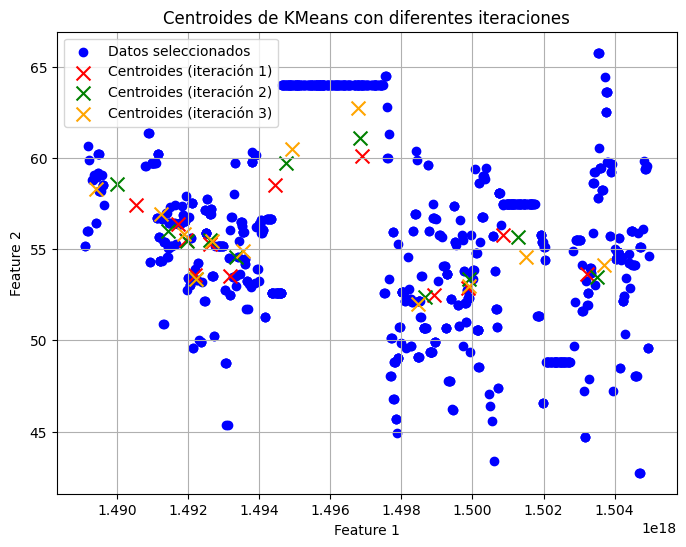

In [294]:
kmeans_iter1.fit(X_selected)
kmeans_iter2.fit(X_selected)
kmeans_iter3.fit(X_selected)

# Obtener los centroides de cada modelo
centroids_iter1 = kmeans_iter1.cluster_centers_
centroids_iter2 = kmeans_iter2.cluster_centers_
centroids_iter3 = kmeans_iter3.cluster_centers_

# Crear un diagrama de dispersión y graficar los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c='blue', label='Datos seleccionados')
plt.scatter(centroids_iter1[:, 0], centroids_iter1[:, 1], marker='x', s=100, c='red', label='Centroides (iteración 1)')
plt.scatter(centroids_iter2[:, 0], centroids_iter2[:, 1], marker='x', s=100, c='green', label='Centroides (iteración 2)')
plt.scatter(centroids_iter3[:, 0], centroids_iter3[:, 1], marker='x', s=100, c='orange', label='Centroides (iteración 3)')
plt.title('Centroides de KMeans con diferentes iteraciones')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [295]:
kmeans_rnd_10_inits = KMeans(n_clusters=2, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=2, n_init=10,
       random_state=11)

In [296]:
def plot_clusterer_comparison(model1, model2, X, title1, title2):
    plt.figure(figsize=(12, 5))

    # Modelo 1
    plt.subplot(1, 2, 1)
    y_pred1 = model1.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred1, cmap='viridis')
    plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Modelo 2
    plt.subplot(1, 2, 2)
    y_pred2 = model2.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred2, cmap='viridis')
    plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=300, c='red', marker='X')
    plt.title(title2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


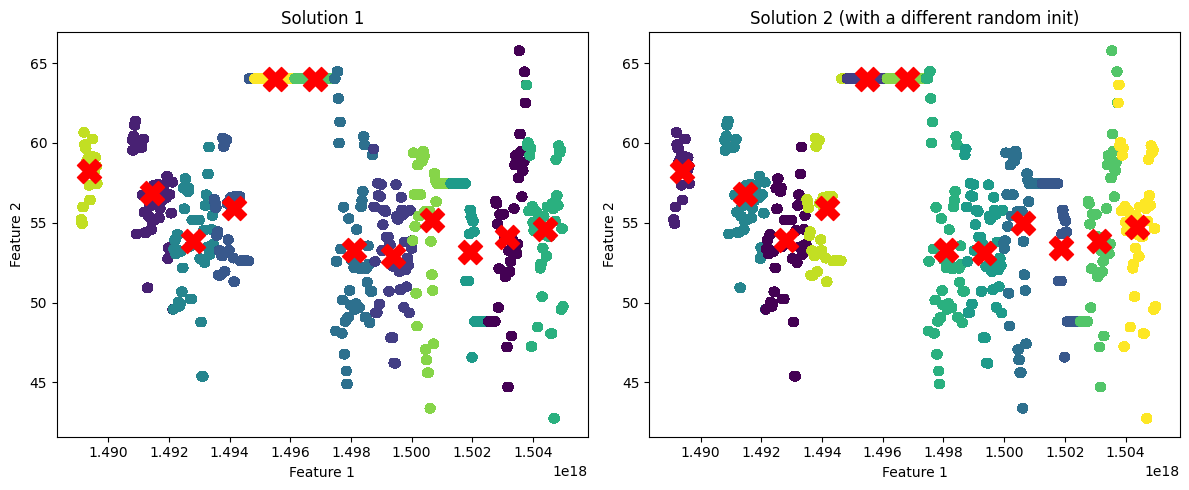

In [297]:

kmeans_rnd_init1 = KMeans(n_clusters=12, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=12, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()


In [298]:
kmeans_rnd_10_inits = KMeans(n_clusters=12, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=12, n_init=10,
       random_state=11)

In [299]:
def plot_kmeans_multi_init(model, X):
    plt.figure(figsize=(8, 6))

    # Visualizar los datos
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='viridis', alpha=0.6)

    # Visualizar los centroides
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                marker='x', s=300, c='red', label='Centroids')

    plt.title('KMeans with Multiple Random Initializations')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

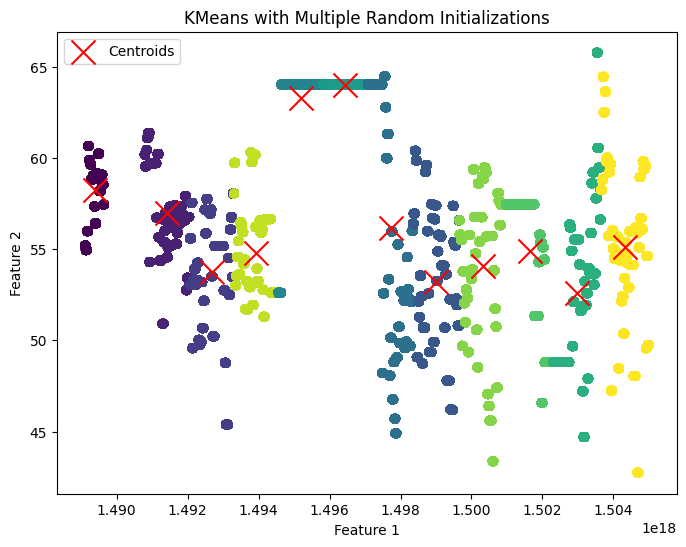

In [300]:
plot_kmeans_multi_init(kmeans_rnd_10_inits, X)

In [301]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return self.fit(X, s

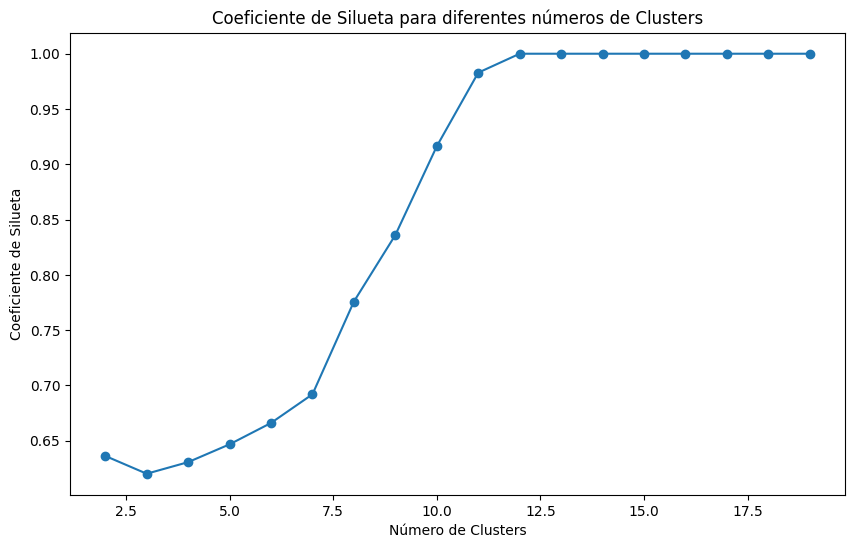

In [302]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(data[:2000])
    score = silhouette_score(data[:2000], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

In [303]:
max_score_idx = np.argmax(silhouette_scores) + 2
max_score = max(silhouette_scores)
print("El mejor valor de K es:", max_score_idx, "con coeficiente de silueta de:", max_score)

El mejor valor de K es: 12 con coeficiente de silueta de: 1.0


## **MINIBATCH**

In [304]:
from sklearn.cluster import MiniBatchKMeans

k = 12  #número de clusters
n_init = 10  #el número de inicializaciones
n_iterations = 100  #número de iteraciones por inicialización
batch_size = 100   # tamaño del lote para las iteraciones
init_size = 500  #tamaño del lote inicia
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
#minimiza la inercia sobre las muestras de datos
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

In [305]:
print("Best Mini-batch KMeans score:", best_kmeans.score(X))

Best Mini-batch KMeans score: -1.0096141223002308e+35
